In [1]:
import pandas as pd

df = pd.read_csv('normalized_feature_set.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35148 entries, 0 to 35147
Data columns (total 11 columns):
indicator_types.value                                35148 non-null int64
kill_chain_phases.kill_chain_phases.ordinality       35148 non-null float64
ip_score                                             35148 non-null float64
url_score                                            35148 non-null float64
observable.object.properties.hashes.type.value       35148 non-null int64
observable.object.properties.header.subject.value    35148 non-null int64
observable.object.properties.size_in_bytes.value     35148 non-null float64
tlp_marking_color                                    35148 non-null int64
target                                               35148 non-null int64
hash_score                                           35148 non-null float64
file_type                                            35148 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.9 MB


In [2]:
feature_list = ['kill_chain_phases.kill_chain_phases.ordinality',
                'ip_score',
                'url_score',
                'observable.object.properties.hashes.type.value',
                'observable.object.properties.header.subject.value',
                'observable.object.properties.size_in_bytes.value',
                'hash_score',
                'file_type'
               ]
x = df[feature_list]
Y = df['target']

In [3]:
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
X_normalized = pd.DataFrame(x_scaled)

X_normalized.head()

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,0,1,2,3,4,5,6,7
0,0.0,0.75000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.75000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.75000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.87852,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y)

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


For Numerical Data

accuracy of "KNeighbors" model is 0.912256742916
accuracy of "Random Forest" model is 0.911346307044
accuracy of "Neural Networks" model is 0.903379993172
accuracy of "SVM" model is 0.910208262206




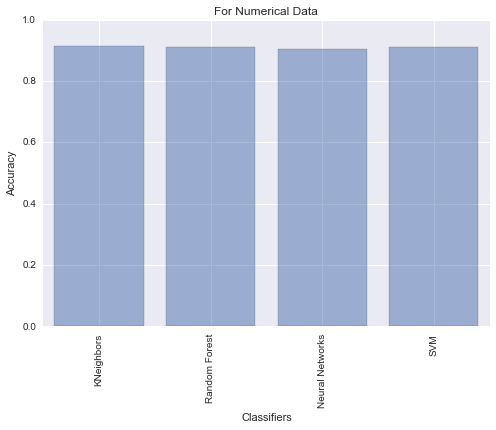

In [5]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn

names = ["KNeighbors", "Random Forest", "Neural Networks", "SVM"]
y_pos = np.arange(len(names))

classifiers = [
    KNeighborsClassifier(10),
    RandomForestClassifier(n_estimators=50),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(40, 20), random_state=1),
    SVC(C=100.),
    ]   

test = pd.DataFrame(names)
accuracy1 = []
accuracy2 = []
accuracy3 = []

print "For Numerical Data\n"
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    accu = metrics.accuracy_score(clf.predict(X_test), y_test)
    print 'accuracy of "{}" model is {}' .format(name, accu)
    accuracy1.append(accu)
    #print name
print "\n"

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('For Numerical Data')
plt.bar(y_pos, accuracy1, align='center', alpha=0.5)
plt.xticks(y_pos, names, rotation='vertical')
plt.show()